In [77]:
from collections import Counter
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

In [ ]:
# 

In [ ]:
# 

In [57]:
genes_s = [
    "Mcm5", "Pcna", "Tyms", "Fen1", "Mcm2", "Mcm4", "Rrm1", "Ung", "Gins2", "Mcm6", 
    "Cdca7", "Dtl", "Prim1", "Uhrf1", "Cenpu", "Hells", "Rfc2", "Rpa2", "Nasp", "Rad51ap1", 
    "Gmnn", "Wdr76", "Slbp", "Ccne2", "Ubr7", "Pold3", "Msh2", "Atad2", "Rad51", "Rrm2", 
    "Cdc45", "Cdc6", "Exo1", "Tipin", "Dscc1", "Blm", "Casp8ap2", "Usp1", "Clspn", "Pola1", 
    "Chaf1b", "Brip1", "E2f8"]
genes_g2m = [
    "Hmgb2", "Cdk1", "Nusap1", "Ube2c", "Birc5", "Tpx2", "Top2a", "Ndc80", "Cks2", "Nuf2", 
    "Cks1b", "Mki67", "Tmpo", "Cenpf", "Tacc3", "4930401O10Rik", "Smc4", "Ccnb2", "Ckap2l", "Ckap2", 
    "Aurkb", "Bub1", "Kif11", "Anp32e", "Tubb4b", "Gtse1", "Kif20b", "Hjurp", "Cdca3", "Jpt1", 
    "Cdc20", "Ttk", "Cdc25c", "Kif2c", "Rangap1", "Ncapd2", "Dlgap5", "Cdca2", "Cdca8", "Ect2", 
    "Kif23", "Hmmr", "Aurka", "Psrc1", "Anln", "Lbr", "Ckap5", "Cenpe", "Ctcf", "Nek2", 
    "G2e3", "Gas2l3", "Cbx5", "Cenpa"]
genes_cc = genes_s + genes_g2m

In [58]:
adata1 = ad.read_h5ad("../08_blastocyst/results/blastocyst_counts.gene_based.gene_name.annotated.filtered.h5ad")
adata2 = ad.read_h5ad("../08_blastocyst/results/scanpy_processed_gene_based.h5ad")

In [59]:
# adata3 = adata1[:,adata1.var.index.isin(genes_cc)].copy()
adata3 = adata1.copy()
adata3.obs["CellType"] = adata2.obs["CellType"].copy()

In [60]:
adata = adata3.copy()
sc.tl.score_genes_cell_cycle(adata, s_genes=genes_s, g2m_genes=genes_g2m)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [61]:
Counter(adata.obs["phase"])

Counter({'G2M': 1499, 'G1': 668, 'S': 368})

In [62]:
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

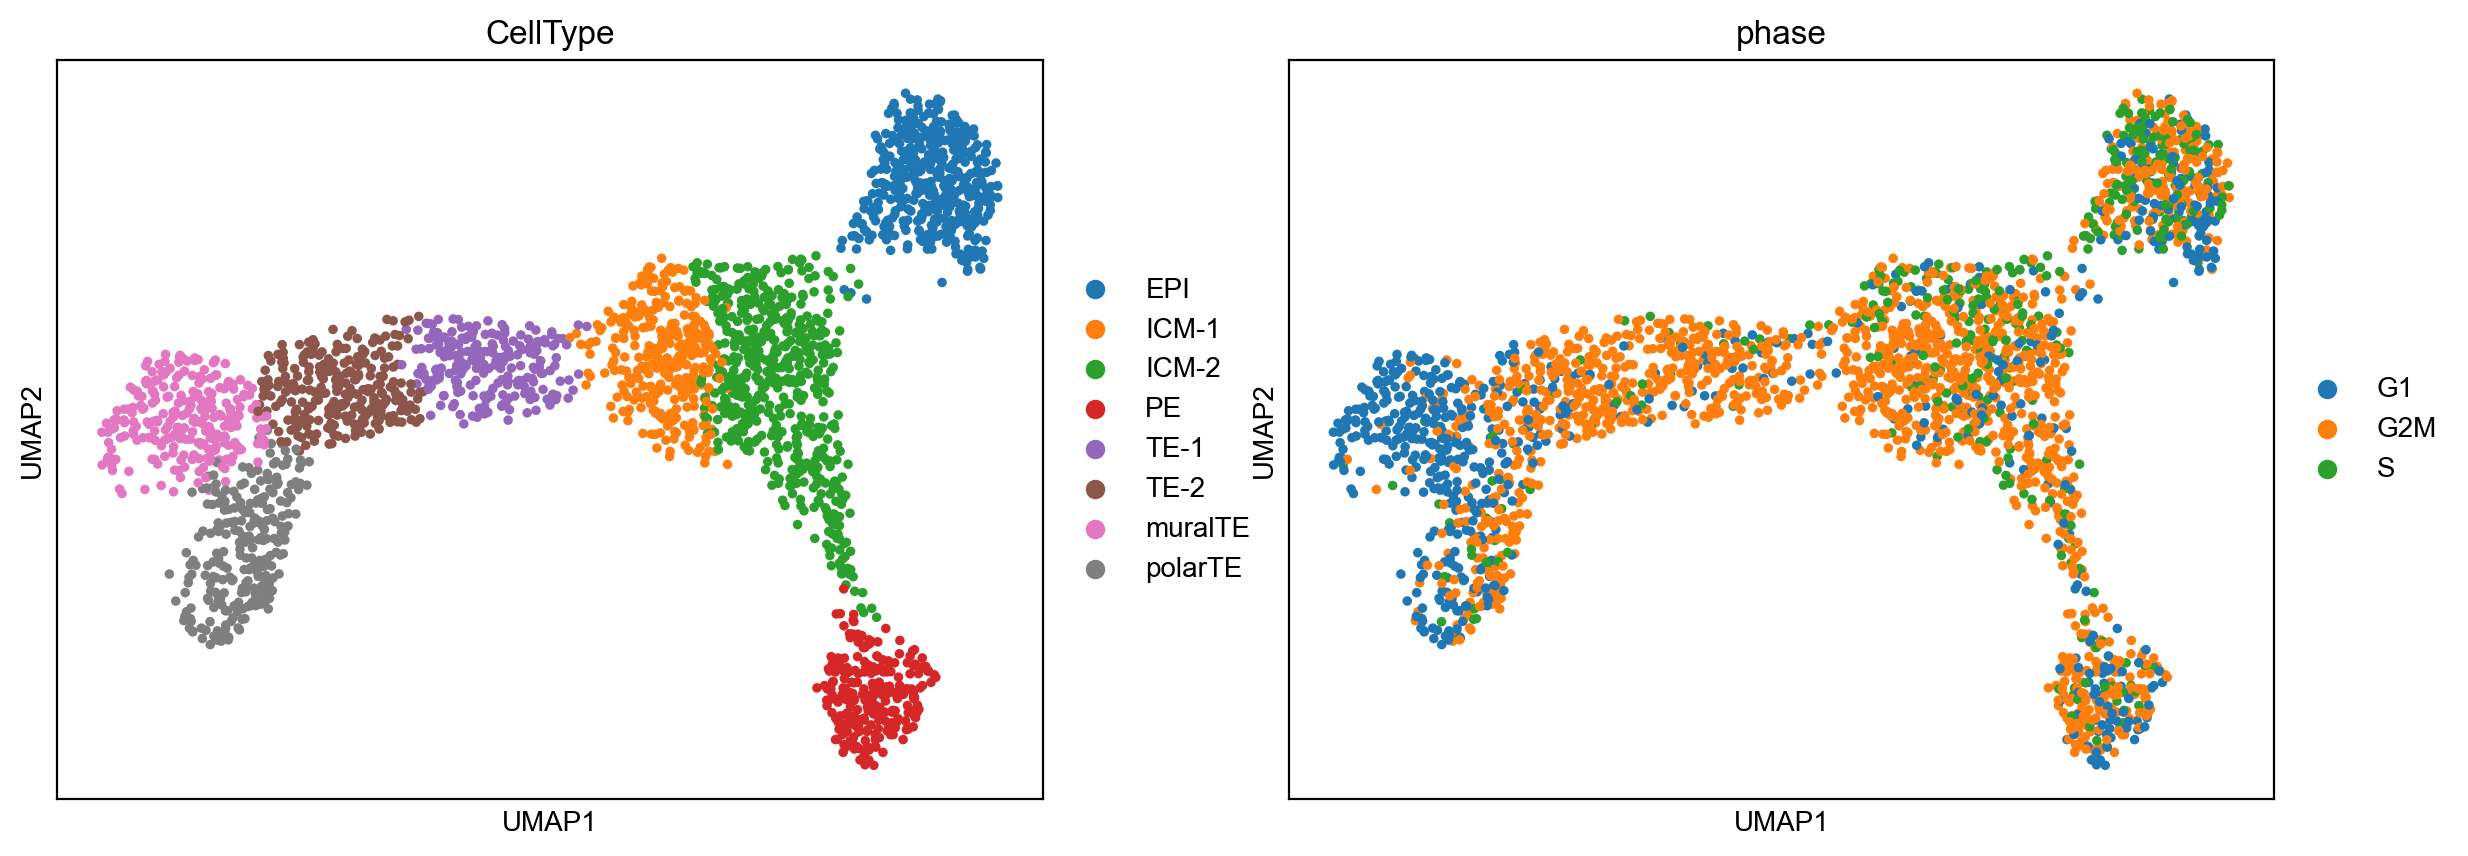

In [64]:
sc.pl.umap(adata, color=["CellType", "phase"])

EPI	431	Counter({'G2M': 193, 'S': 133, 'G1': 105})
ICM-1	309	Counter({'G2M': 242, 'S': 38, 'G1': 29})
ICM-2	563	Counter({'G2M': 381, 'S': 119, 'G1': 63})
PE	241	Counter({'G2M': 149, 'G1': 64, 'S': 28})
TE-1	218	Counter({'G2M': 181, 'G1': 25, 'S': 12})
TE-2	266	Counter({'G2M': 206, 'G1': 50, 'S': 10})
muralTE	251	Counter({'G1': 210, 'G2M': 36, 'S': 5})
polarTE	256	Counter({'G1': 122, 'G2M': 111, 'S': 23})


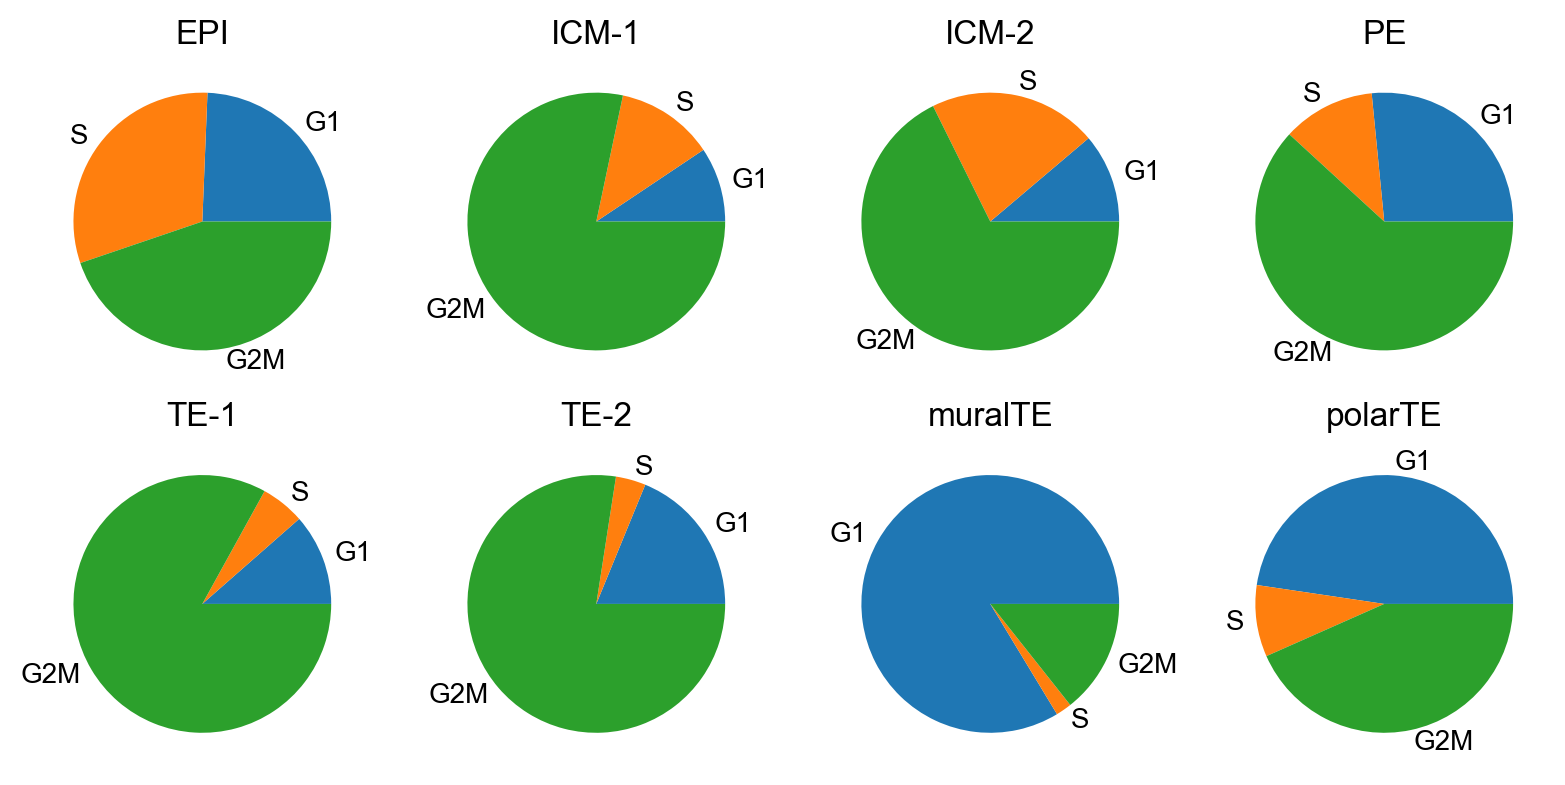

In [83]:
fig, axs = plt.subplots(2, 4, figsize=(8, 4))
phases = ["G1", "S", "G2M"]
i = 0
for ct, tmp in sorted(adata.obs.groupby(by="CellType")):
    counter = Counter(tmp["phase"])
    counts = [counter[p] for p in phases]
    print(ct, len(tmp), counter, sep="\t")
    irow = int(i / 4)
    icol = i % 4
    ax = axs[irow][icol]
    plt.sca(ax)
    plt.title(ct)
    plt.pie(counts, labels=phases)
    i += 1
plt.tight_layout()
plt.show()

# dynamo

In [40]:
adata1 = ad.read_h5ad("../09_rna_velocity/results/dynamo_data_gene_based.h5ad")
adata2 = ad.read_h5ad("../08_blastocyst/results/scanpy_processed_gene_based.h5ad")

In [41]:
adata3 = adata1[:,adata1.var.index.isin(genes_cc)].copy()
adata3

AnnData object with n_obs × n_vars = 2136 × 96
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs', 'CellType'
    var: 'GeneID', 'GeneType', 'Chrom', 'Start', 'End', 'Strand'
    layers: 'nascent', 'new', 'total'

In [ ]:
import dynamo as dyn

In [53]:
adata = adata3.copy()
dyn.pp.recipe_monocle(adata, tkey="Time")

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> detected experiment type: one-shot
|-----> filtering cells...
|-----> 2136 cells passed basic filters.
|-----> filtering gene...
|-----> 96 genes passed basic filters.
|-----> calculating size factor...
|-----? only 96 genes passed basic filtering, but you requested 2000 genes for feature sele

/home/chenzonggui/tmp/ipykernel_899/3175244546.py:2: DeprecationWarning: recipe_monocle is deprecated and will be removed in a future release. Please update your code to use the new replacement function.
  dyn.pp.recipe_monocle(adata, tkey="Time")


|-----> [Cell Phase Estimation] completed [430.3844s]
|-----> [Cell Cycle Scores Estimation] completed [0.2468s]
|-----> [recipe_monocle preprocess] completed [0.3911s]


In [56]:
adata

AnnData object with n_obs × n_vars = 2136 × 96
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs', 'CellType', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'cell_cycle_phase'
    var:

In [ ]:
dyn.tl.dynamics(adata, model='stochastic', cores=3, NTR_vel=True)
dyn.tl.reduceDimension(adata)
dyn.tl.leiden(adata)
dyn.tl.hdbscan(adata)
dyn.tl.louvain(adata)
dyn.tl.cell_velocities(adata, calc_rnd_vel=True)
dyn.vf.VectorField(adata, basis='umap')

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> detected experiment type: one-shot
|-----> filtering cells...
|-----> 2136 cells passed basic filters.
|-----> filtering gene...
|-----> 96 genes passed basic filters.
|-----> calculating size factor...
|-----? only 96 genes passed basic filtering, but you requested 2000 genes for feature sele

/home/chenzonggui/tmp/ipykernel_899/2062675347.py:3: DeprecationWarning: recipe_monocle is deprecated and will be removed in a future release. Please update your code to use the new replacement function.
  dyn.pp.recipe_monocle(adata, tkey="Time")


|-----> [Cell Phase Estimation] completed [136.6148s]
|-----> [Cell Cycle Scores Estimation] completed [0.2603s]
|-----> [recipe_monocle preprocess] completed [0.4267s]
|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] completed [12.4839s]
|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [28.6134s]
|-----> accessing adj_matrix_key=connectivities built from args for clustering...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree s

|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_cycle_phase by stack threshold when stacking color because it is not a numeric type


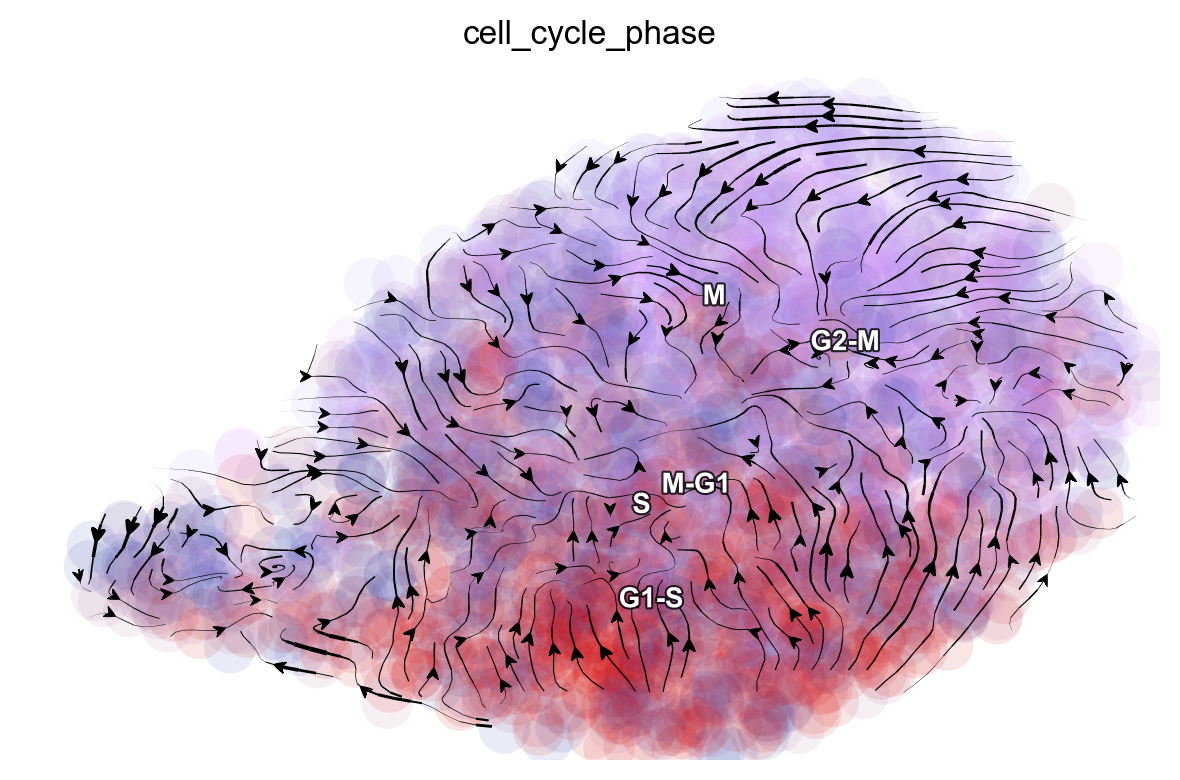

In [48]:
dyn.pl.streamline_plot(adata, color='cell_cycle_phase', basis='umap', save_show_or_return='show')

|-----------> plotting with basis key=X_umap_rnd
|-----------> skip filtering cell_cycle_phase by stack threshold when stacking color because it is not a numeric type


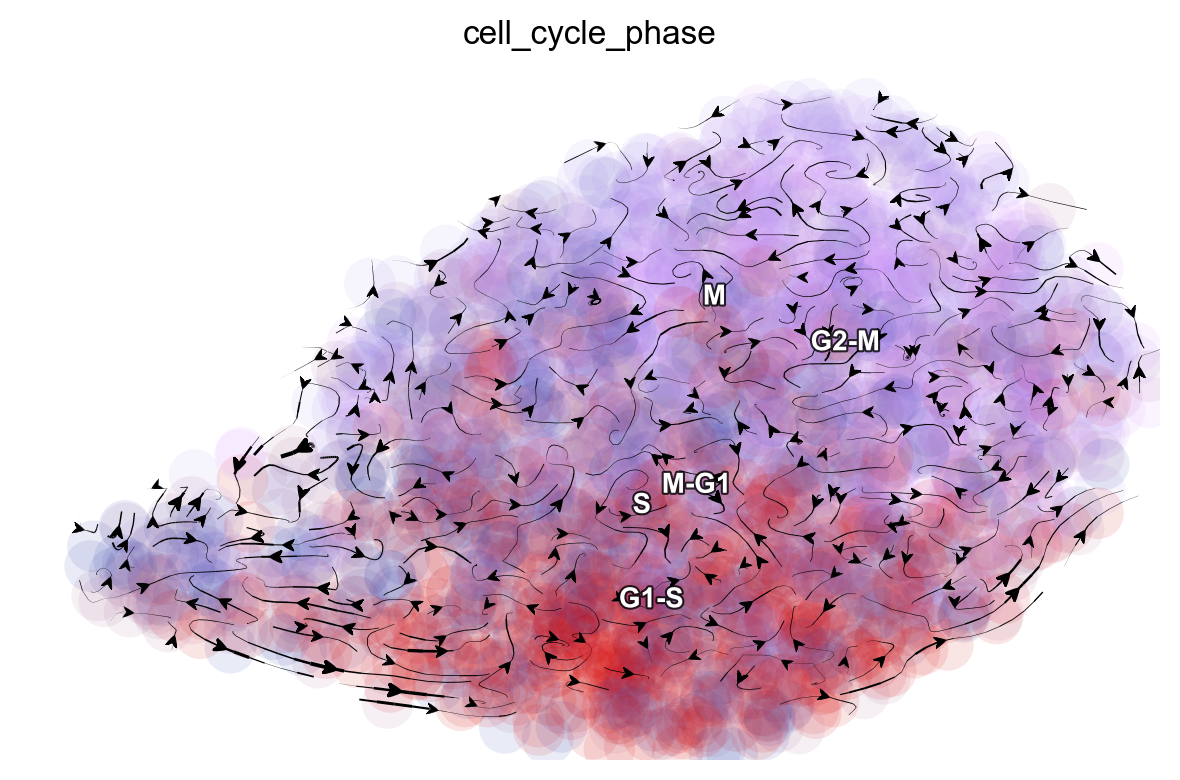

In [52]:
dyn.pl.streamline_plot(adata, color='cell_cycle_phase', basis='umap_rnd', save_show_or_return='show')